In [861]:
from IPython.display import HTML
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [862]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [693]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 
%pylab inline 


import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [694]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [695]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [696]:
boston.data.shape

(506, 13)

In [697]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [698]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [699]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [700]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [701]:
print(boston.target.shape)

(506,)


In [702]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [703]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [704]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

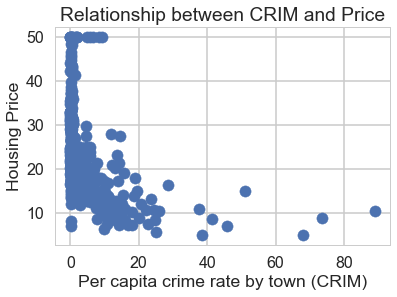

In [705]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Explanation: Above we can see a negative, non-linear relationship between housing price and crime rate per capita.

### Variables of Interest

- CRIM     per capita crime rate by town
- INDUS    proportion of non-retail business acres per town
- RM       average number of rooms per dwelling
- PTRATIO  pupil-teacher ratio by town

**RM & PRICE**

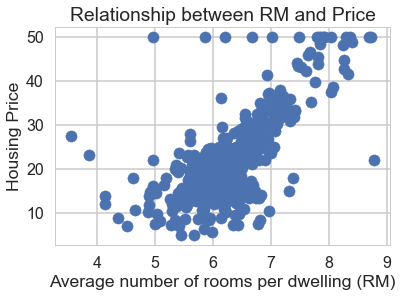

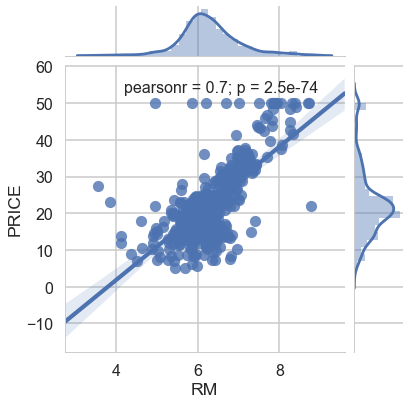

In [706]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

sns.jointplot(bos.RM, bos.PRICE, kind="reg")

**Explanation:** Here we can see what seems like a significant linear relationship between the average number of rooms in a house and price. Usually more rooms means bigger house which means higher price, however we definitely have seen small homes with a lot of rooms that try to be misleading to fetch a higher price so that assumption isn't universally true.

**PTRATIO & PRICE**

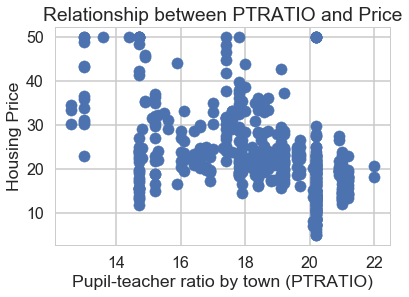

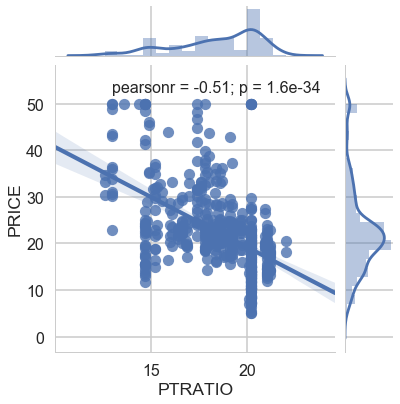

In [707]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

sns.jointplot(bos.PTRATIO,bos.PRICE, kind="reg")

**Explanation:** Here we can see a significant negative relationship between pupil-teacher ratio and price of the home. Interestingly, it would seem the opposite as most people would assume better schools means pricier homes; however what we are seeing a proximate to that statement since better schools and pricier neighborhoods tend to have lower pupil-teacher ratios than poorer neighborhoods and cheaper homes. I think this graph is really telling about demographics about an area.

**CRIM & PRICE**

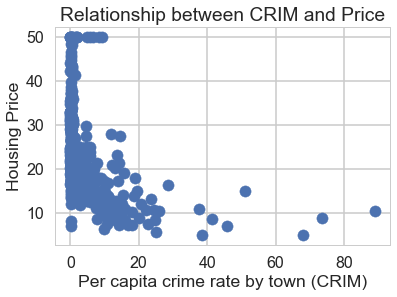

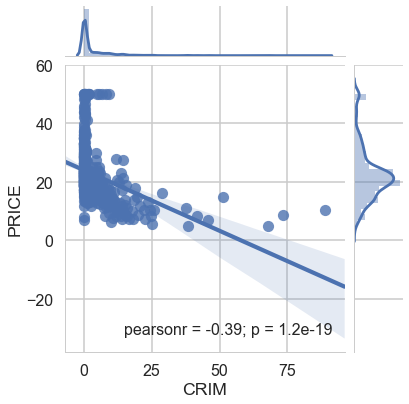

In [708]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

sns.jointplot(bos.CRIM, bos.PRICE, kind="reg")

**Explanation:** I feel this was the next obvious step toward the telling of demographics. Here we can see a significant negative relationship between crime in an area and price. Interestingly, this predictor is less strongly associated than pupil-teacher ratio but this may have more to do with the data itself.

**INDUS & PRICE**

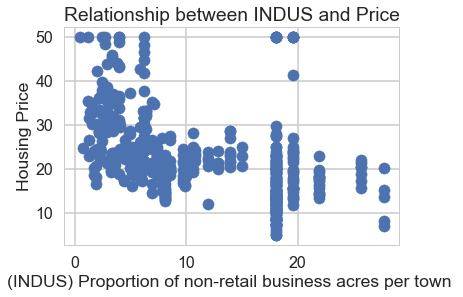

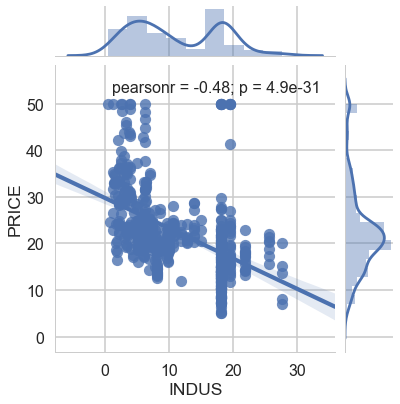

In [709]:
# scatter plot between *INDUS* and *PRICE*
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("(INDUS) Proportion of non-retail business acres per town ")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")

sns.jointplot(bos.INDUS, bos.PRICE, kind="reg")

**Explanation:** Once again here is another demographic variable showing that there is a negative relationship between house price and proportion of non-retail businesses per town. Here it is showing that the more industrialized the area the less the homes tend to cost.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

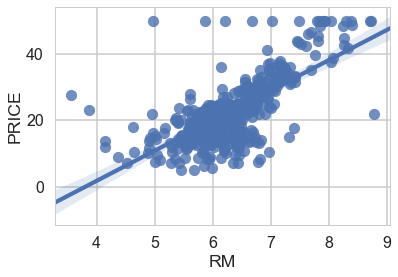

In [710]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


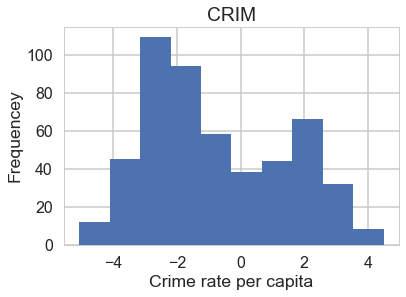

In [711]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

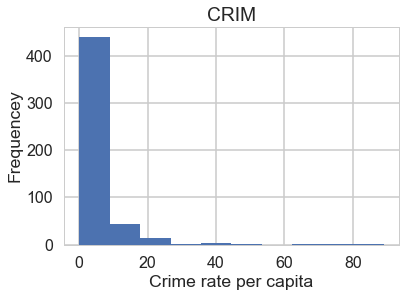

In [712]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

**Explanation:** By taking the log transformation of the crime variable we can see a more normal distribution of the data and it can make it easer to make predictions and look at relationships between crime and other variables.

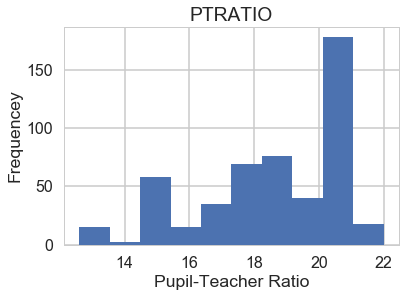

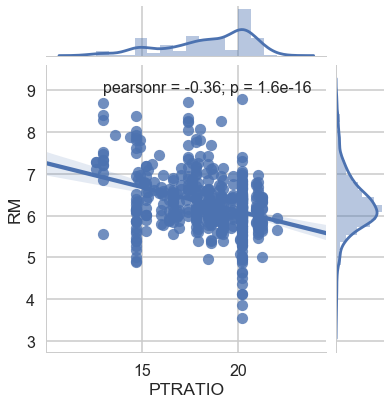

In [713]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequencey")
plt.show()

sns.jointplot(bos.PTRATIO,bos.RM, kind="reg")

**Explanation:** Here we can see a significant negative correlation between pupil-techer ratio and number of rooms in a home. This echoes the previous chart where price is negatively correlated with pupil-teacher ratio. In this case number of rooms is a proximate for house price. It is important to point out that the relationship isn't particularly strong, but it is there none-the-less.

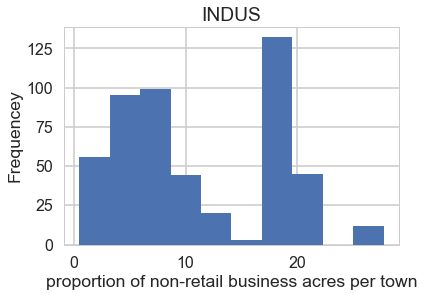

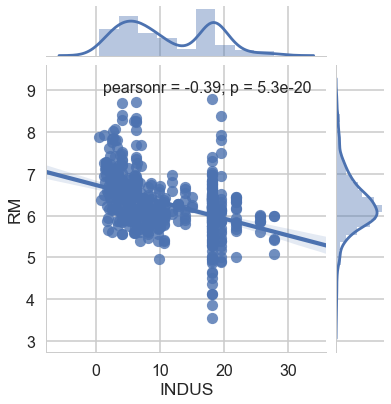

In [714]:
plt.hist(bos.INDUS)
plt.title("INDUS")
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Frequencey")
plt.show()

sns.jointplot(bos.INDUS, bos.RM, kind="reg")

**Explanation:** See explanation above. Once again number of rooms is serving as a proximate for home price, but in this case we are seeing the industry variabe. We can see a sigificant negative correlation between number of rooms and non-retail business acres per town.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [715]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [716]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.49e-74
Time:                        15:35:38   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

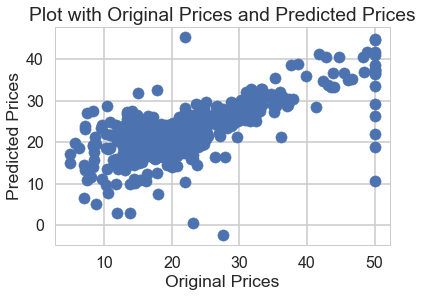

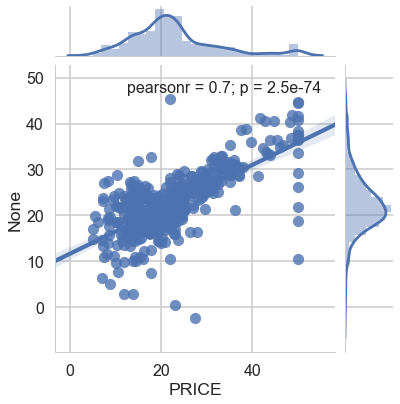

In [717]:
plt.scatter(bos.PRICE, m.fittedvalues)
plt.xlabel("Original Prices")
plt.ylabel("Predicted Prices")
plt.title("Plot with Original Prices and Predicted Prices")

sns.jointplot(bos.PRICE, m.fittedvalues, kind="reg")

**Explanation:** We see a fairly good correlation coeficient of .7, meaning that 70% of the predicted housing price is explained by the model (number of rooms in home). For every unit increase in number of rooms the housing price increases by approximately $9,000. In the scatterplot above we can see some interesting outliers where increasing room numbers doesn't necessarily correspond in housing price. We can possibly attribute the increased housing price with some other covariate that isn't being explored in the model. The verticle line of observations at the 50 mark is a bit weird.

### Fitting Linear Regression using `sklearn`


In [718]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [719]:
# # lm.<tab>
lm.fit(X,bos.PRICE)
lm.coef_
lm.intercept_

36.45948838509015

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [720]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [721]:
#Set the fit_intercept parameter to false
lm = LinearRegression(fit_intercept = False)
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

An intercept helps with predictions, but if we aren't interested in predicting and just interested in looking at the relationship between the covariates we can exclude the intercept. In some cases it actually may be fine to have non-normally distributed the ordinary least squares estimate is still a reasonable estimator in the face of non-normal errors. In particular, the Gauss-Markov Theorem states that the ordinary least squares estimate is the best linear unbiased estimator (BLUE) of the regression coefficients ('Best' meaning optimal in terms of minimizing mean squared error) as long as the errors: 

    (1) have mean zero

    (2) are uncorrelated

    (3) have constant variance

Notice there is no condition of normality here (or even any condition that the errors are IID). 

https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables

https://www.annualreviews.org/doi/full/10.1146/annurev.publhealth.23.100901.140546

HOWEVER, if you are interested in checking for normality a QQ-plot and a Durbin-Watson test is fine. In fact, it is also common-place where the dependant and independant variables may NOT be necessarily normally distributed. However, the relationship between the dependant and independant predictors may not be best explained with a linear model. Everything is fine.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [722]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [723]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [724]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [725]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [726]:
def boxPlot(variable):
    sns.set_style("whitegrid")
    #sns.load_dataset("tips")
    sns.boxplot(x=variable)
    return plt.show(),plt.clf()

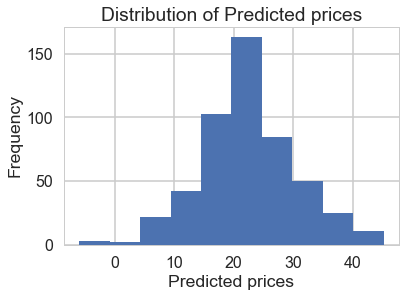

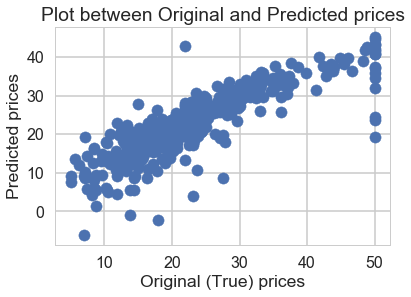

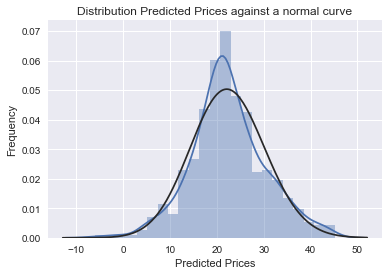

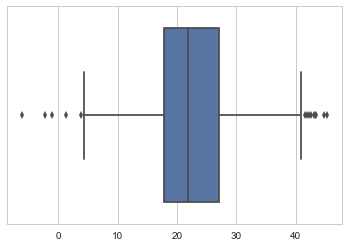

(None, None)

<Figure size 432x288 with 0 Axes>

In [727]:
predicted = lm.predict(X)
plt.hist(predicted)
plt.title("Distribution of Predicted prices")
plt.xlabel("Predicted prices")
plt.ylabel("Frequency")
plt.show()

#Scatter plot
plt.scatter(bos.PRICE,predicted)
plt.title("Plot between Original and Predicted prices")
plt.xlabel("Original (True) prices")
plt.ylabel("Predicted prices")
plt.show()

sns.set()
_ = sns.distplot(predicted, kde=True, fit=stats.gamma)
_ = plt.title('Distribution Predicted Prices against a normal curve')
_ = plt.xlabel('Predicted Prices')
_ = plt.ylabel('Frequency')

plt.show()

boxPlot(predicted)

**Explanation:** Judging by the histogram the predicted prices appear to be normally distributed around a mean of 20. There are a number of outliers that may have a minimal effect on the prediction but I don't think it is worth doing anything major to address them. Considering that the outliers are on opposite sides of the distribution could mean that they balance each other out anyways. If we felt that the outliers had a negative effect on the prediction they could be dropped altogether, but how will it affect the generalizeability in the model?

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [728]:
print(np.sum((bos.PRICE.T - lm.predict(X)) ** 2)) 

12228.046261044003


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [729]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31908.789708316464


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [730]:
from sklearn import feature_selection

def linear_regression(X, y):
    '''
    Regression Function for this project.
    '''
    X_reshape=X.values.reshape(-1,1)
    reg = LinearRegression().fit(X_reshape, y)
    intercept = reg.intercept_
    coef = reg.coef_
    predict=reg.predict(X_reshape)
    r2 = reg.score(X_reshape, y)
    fstat,pvalue=sklearn.feature_selection.f_regression(X_reshape, y)
    #fstat = (r2)/(1-r2)
    #pvalue = stats.f.cdf(fstat, len(X_reshape)-1, len(y)-1)
    try:
        sns.jointplot(X, y, kind="reg")
    except:
        print("Can't Plot.")
    return fstat[0],r2,pvalue[0],intercept,coef,predict

f-statistic: 175.10554287576016 
R2: 0.257847318009223 
p-value: 1.609509478434141e-34


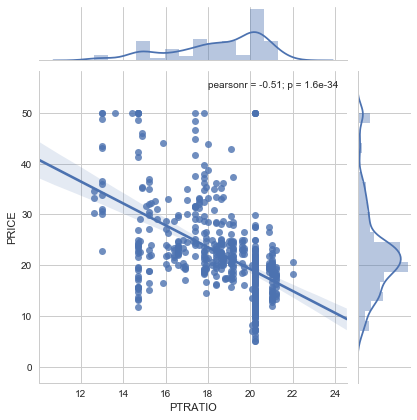

In [731]:
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos.PTRATIO, bos.PRICE)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue)

In [732]:
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.61e-34
Time:                        15:35:43   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

**Explanation:** According to an f-statistic(175.10) with a pvalue(0.00<.05) and an r2(0.25) pupil-teacher ratio is significant in the model but the association is particularly strong relationship doesn't describe price particularly well. Judging by the graph there is a negative relationship between pupil-teacher ratio and home price. For every unit increase in pupil-teacher ratio the home price decreases by 2.1572.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [733]:
from sklearn import feature_selection

def linear_regression(X, y, data=bos):
    '''
    Regression Function for this project.
    '''
    reg = LinearRegression().fit(X, y)
    intercept = reg.intercept_
    coef = reg.coef_
    predict=reg.predict(X)
    r2 = reg.score(X, y)
    fstat,pvalue=sklearn.feature_selection.f_regression(X, y)
    return fstat[0],r2,pvalue[0],intercept,coef,predict

In [734]:
variables = ['CRIM', 'RM', 'PTRATIO']
y = bos.PRICE

fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos[variables], y)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue)

f-statistic: 89.48611475768125 
R2: 0.5943412940723471 
p-value: 1.1739870821944483e-19


**Explanation:** After inputting crime,room number,and pupil-teacher ratio into a model predicting price we find that all cavariates in the model are significant, with the number of rooms having the strongest impact on the model. The pvalue from the f-statistic shows statistical significance for the model and the model's corellation coeficient if 0.59; meaning there is a moderate strength of association between the covariates and price in the model. Above we can see that the greater the home price, the greater number of the rooms, decrease in pupil-teacher ratio, and decrease in crime.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [735]:
model2 = ['CRIM', 'RM', 'PTRATIO','INDUS','LSTAT']
model1 = ['CRIM', 'RM', 'PTRATIO']
y = bos.PRICE

fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos[model1], y)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue)

m = ols('PRICE ~ '+'+'.join(model1),bos).fit()
m1_aic=m.aic
print(m.summary())

f-statistic: 89.48611475768125 
R2: 0.5943412940723471 
p-value: 1.1739870821944483e-19
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           6.15e-98
Time:                        15:35:43   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [736]:
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos[model2], bos.PRICE)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue)

m = ols('PRICE ~ '+'+'.join(model2),bos).fit()
m2_aic=m.aic
print(m.summary())

f-statistic: 89.48611475768125 
R2: 0.6816655091824328 
p-value: 1.1739870821944483e-19
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          8.89e-122
Time:                        15:35:44   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

**Explanation:** According to a significant f-test of  pvalue(8.89e-122<.05), an R2 of .68, and an AIC of 3112; Model 2 seems to be a better fitting model than Model 1. 

In [737]:
if m1_aic-m2_aic>0:
    print('Based on a lower AIC of (Model 1)',m1_aic,'>',m2_aic,'(Model 2) is better.')
elif m1_aic-m2_aic==0:
    print('No improvement.')
else:
    print('Based on a lower AIC of (Model 1)',m1_aic,'<',m2_aic,'(Model 2) is better.')

Based on a lower AIC of (Model 1) 3231.9451235449956 > 3113.285920389766 (Model 2) is better.


## Extra: Model Selection Procedures - Forward/Backward Selection


    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per 10,000 dollars
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in 1000's dollars

In [738]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

**Full Model**

In [739]:
Full_Model = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos[Full_Model], bos.PRICE)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue)

m = ols('PRICE ~ '+'+'.join(Full_Model),bos).fit()
full_AIC=m.aic
print(m.summary())

f-statistic: 89.48611475768125 
R2: 0.7406426641094094 
p-value: 1.1739870821944483e-19
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          6.72e-135
Time:                        15:35:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

**Drop Insignificant covariates one at a time and paying carefull attention to effect of other covariates**

Drop Age

In [740]:
Reduced = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos[Reduced], bos.PRICE)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue)

m = ols('PRICE ~ '+'+'.join(Reduced),bos).fit()
Reduced_AIC=m.aic
print(m.summary())

f-statistic: 89.48611475768125 
R2: 0.7406412165505145 
p-value: 1.1739870821944483e-19
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          6.08e-136
Time:                        15:35:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Drop INDUS

## Final Model

In [741]:
Final_Model = ['CRIM', 'ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos[Final_Model], bos.PRICE)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue,'\n')

m = ols('PRICE ~ '+'+'.join(Final_Model),bos).fit()
Final_AIC=m.aic
print(m.summary())

f-statistic: 89.48611475768125 
R2: 0.7405822802569575 
p-value: 1.1739870821944483e-19 

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          5.54e-137
Time:                        15:35:45   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Explanation:** Here we see a significant model (pval:5.54e-137<.05) with fairly good prediction (R2:0.741) that manages to control for a lot of factors that are available in the dataset. ('CRIM', 'ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT')
Furthermore with an AIC of 3022 has a much better AIC than any of the previous models explored thus far.

Interestingly, after using model selection procedures and accounting for much of the available data in the data set we se the covariate with the strongest effect to be NOX (nitric oxides concentration), that was not something I was expecting at all. But there it is for every unit increase we see NOX decrease by -17.38; perhaps NOX has a strong relationship for urban/rural locations and can thereby be used as a replacement variable for urban/rural location?


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

Fitted Residuals Plot

    'CRIM' (per capita crime rate by town)
    'RM' (average number of rooms per dwelling)
    'PTRATIO' (pupil-teacher ratio by town) 

In [793]:
def boxPlot(variable):
    sns.set_style("whitegrid")
    #sns.load_dataset("tips")
    sns.boxplot(x=variable)
    return plt.show(),plt.clf()

Transpose Crime to Ln(Crime)

In [794]:
df=bos
df['LOG_CRIM']=np.log(df['CRIM'])

In [795]:
reduced_model_3 = ['CRIM', 'RM', 'PTRATIO']
y = df.PRICE

fstat,r2,pvalue,intercept,coef,predict=linear_regression(df[reduced_model_3], y)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue,'\n')

m = ols('PRICE ~ '+'+'.join(reduced_model_3),bos).fit()
r3_aic=m.aic
print(m.summary())

f-statistic: 89.48611475768125 
R2: 0.5943412940723471 
p-value: 1.1739870821944483e-19 

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           6.15e-98
Time:                        15:53:50   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [796]:
model_fit = ols('PRICE ~ '+'+'.join(reduced_model_3),df).fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

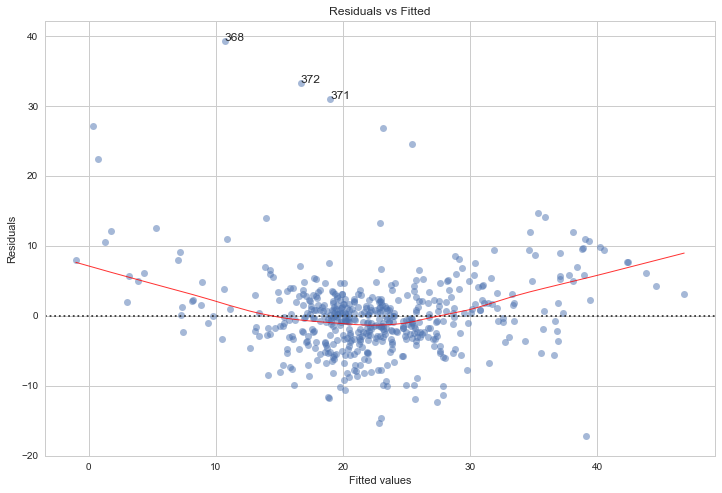

In [797]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y, data=bos, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, xy=(model_fitted_y[i],model_residuals[i]))

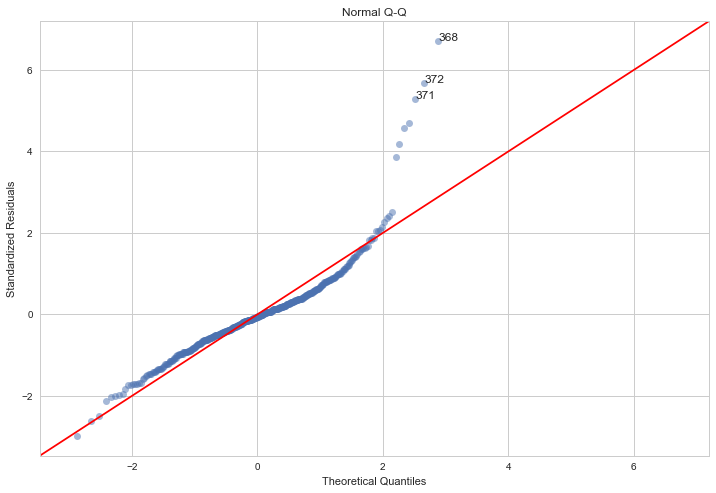

In [798]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
model_norm_residuals[i]))

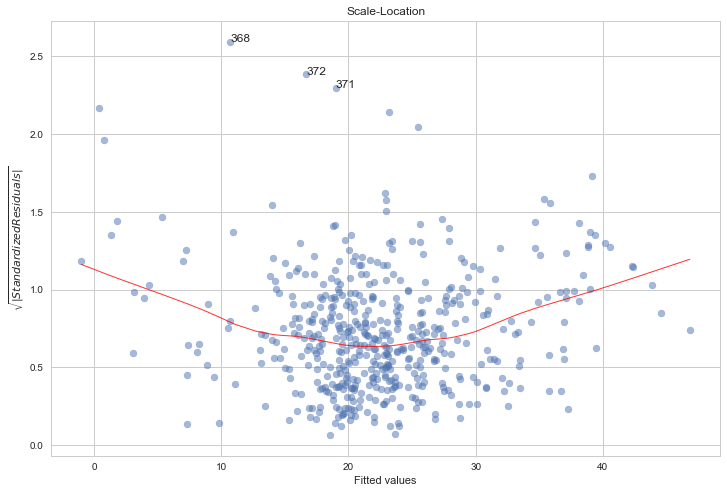

In [799]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i],model_norm_residuals_abs_sqrt[i]))

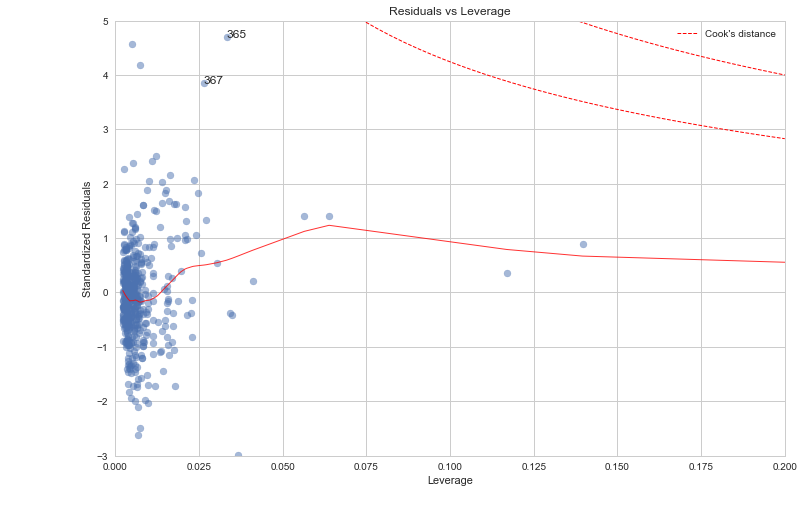

In [800]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))
    
# cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),  np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right')


In [801]:
Observed_Column=df.RM
quartile_1=np.percentile(Observed_Column, 25)
quartile_3=np.percentile(Observed_Column, 75)
inter_quartile_range=quartile_3-quartile_1
Inner_fence=1.5*(inter_quartile_range)
Outer_fence=3*inter_quartile_range
#Fences for viewing outliers
#mild outliers
inner_lower_fence=quartile_1-Inner_fence
inner_upper_fence=quartile_3+Inner_fence
#strong outliers
outer_lower_fence=quartile_1-Outer_fence
outer_upper_fence=quartile_3+Outer_fence

In [802]:
print('Strong Outliers:')
comparison=(Observed_Column<outer_lower_fence) | (Observed_Column>outer_upper_fence)
df[comparison]


Strong Outliers:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,LOG_CRIM
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.7,7.12,27.5,1.516417


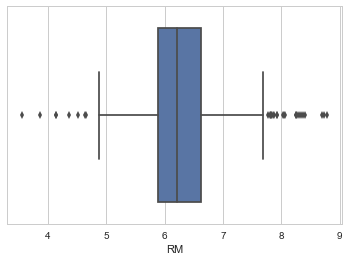

(None, None)

<Figure size 432x288 with 0 Axes>

In [803]:
boxPlot(Observed_Column)

In [804]:
Observed_Column=df.PTRATIO
quartile_1=np.percentile(Observed_Column, 25)
quartile_3=np.percentile(Observed_Column, 75)
inter_quartile_range=quartile_3-quartile_1
Inner_fence=1.5*(inter_quartile_range)
Outer_fence=3*inter_quartile_range
#Fences for viewing outliers
#mild outliers
inner_lower_fence=quartile_1-Inner_fence
inner_upper_fence=quartile_3+Inner_fence
#strong outliers
outer_lower_fence=quartile_1-Outer_fence
outer_upper_fence=quartile_3+Outer_fence
print('Strong Outliers:')
comparison=(Observed_Column<outer_lower_fence) | (Observed_Column>outer_upper_fence)
df[comparison]

Strong Outliers:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,LOG_CRIM


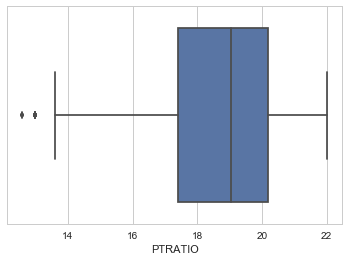

(None, None)

<Figure size 432x288 with 0 Axes>

In [805]:
boxPlot(Observed_Column)

In [806]:
Observed_Column=df.CRIM
quartile_1=np.percentile(Observed_Column, 25)
quartile_3=np.percentile(Observed_Column, 75)
inter_quartile_range=quartile_3-quartile_1
Inner_fence=1.5*(inter_quartile_range)
Outer_fence=3*inter_quartile_range
#Fences for viewing outliers
#mild outliers
inner_lower_fence=quartile_1-Inner_fence
inner_upper_fence=quartile_3+Inner_fence
#strong outliers
outer_lower_fence=quartile_1-Outer_fence
outer_upper_fence=quartile_3+Outer_fence
print('Strong Outliers:')
comparison=(Observed_Column<outer_lower_fence) | (Observed_Column>outer_upper_fence)
df[comparison]

Strong Outliers:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,LOG_CRIM
374,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8,2.917673
375,19.6091,0.0,18.1,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0,2.975994
376,15.2880,0.0,18.1,0.0,0.671,6.649,93.3,1.3449,24.0,666.0,20.2,363.02,23.24,13.9,2.727068
378,23.6482,0.0,18.1,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.69,13.1,3.163287
379,17.8667,0.0,18.1,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2,2.882939
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4,4.488369
381,15.8744,0.0,18.1,0.0,0.671,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08,10.9,2.764708
384,20.0849,0.0,18.1,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8,2.999968
385,16.8118,0.0,18.1,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2,2.822081
386,24.3938,0.0,18.1,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,10.5,3.194329


In [ ]:
#ZN,INDUS,CHAS,TAX,PTRATIO,RAD

Above we can see duplicates in the data set that would probably need to be de-duplicated in order for the data to be fixed.

In [807]:
outliers=list(df[comparison].index)

In [808]:
outliers.append(365)
outliers.append(367)
outliers.append(368)
outliers.append(369)
outliers.append(370)
outliers.append(371)
outliers.append(372)
outliers.append(385)


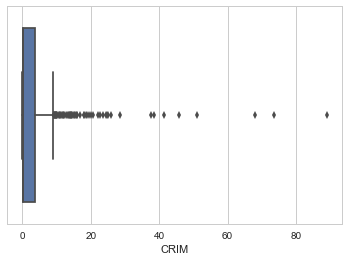

(None, None)

<Figure size 432x288 with 0 Axes>

In [809]:
boxPlot(Observed_Column)

Dropping Outlier Rows

In [810]:
df=df.drop(df.index[outliers])

In [811]:
reduced_model_3 = ['CRIM', 'RM', 'PTRATIO']
y = df.PRICE

fstat,r2,pvalue,intercept,coef,predict=linear_regression(df[reduced_model_3], y)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue,'\n')

m = ols('PRICE ~ '+'+'.join(reduced_model_3),bos).fit()
reduced_aic=m.aic
print(m.summary())

f-statistic: 105.42235759191169 
R2: 0.7554285039700039 
p-value: 1.9458061007305826e-22 

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           6.15e-98
Time:                        15:54:09   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [812]:
model_fit = ols('PRICE ~ '+'+'.join(reduced_model_3),df).fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

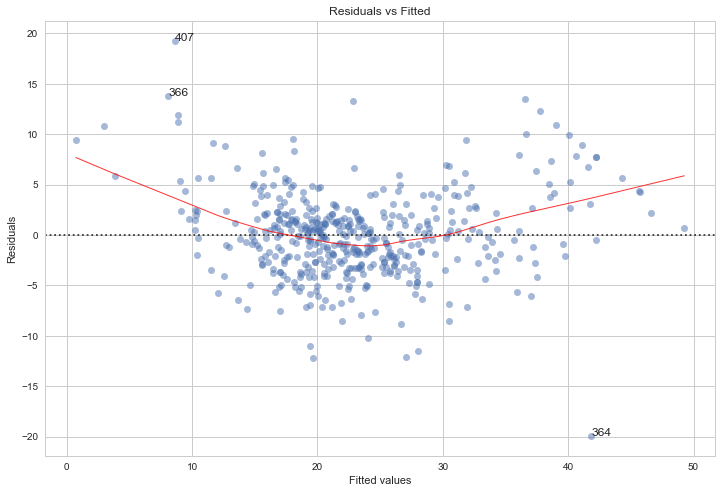

In [813]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y, data=bos, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, xy=(model_fitted_y[i],model_residuals[i]))

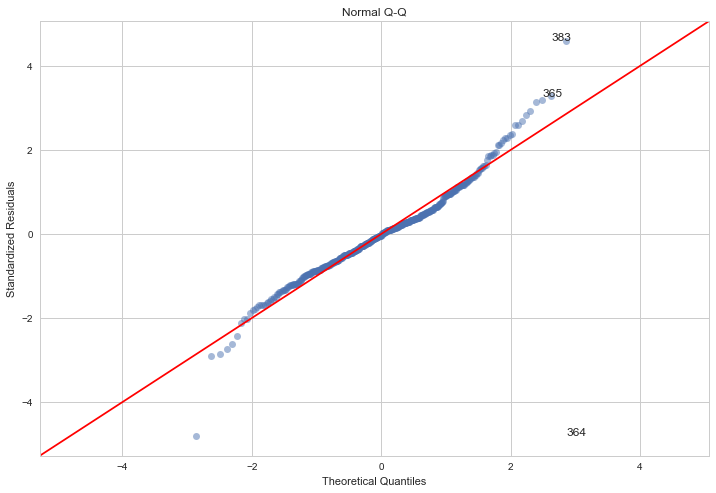

In [814]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],model_norm_residuals[i]))

**Explanation:**

Although showing model significance using the reduced model and looking at residuals, QQ-plot, and leverage plot we find that the model seems to have problem with extreme values, normality, and predicting the y's. After dropping many outliers there hasn't been much improvement on the model; seemingly the more outliers are removed the outliers are found. I feel there is definitely a problem with multi-collinearity and duplicate values; which needed to be addressed in the data exploration phase. Furthermore, I would not choose this model to be my final modal as shown previously I would start with most of the variables in the model and then use selection procedures to narrow down my list of variables for the model; not universally, but in this case this would be my process. The problem we have shown here is that there is a problem with the data itself, and as they say garbage-in, garbage-out. 